In [ ]:
import warnings
import os

warnings.filterwarnings('ignore')

print("Python warnings have been suppressed")

from tfxkit.core.model_factory import ModelFactory
import tfxkit
import logging
import sys
import custom_model

from tfxkit.core.logger import setup_logging
setup_logging(level=logging.INFO)

# print(f'{tfxkit.__version__ = }')
reload = True
mf = ModelFactory(
            "/lustre/fs23/group/icecube/nrad/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/D16_M64_64_64_64_E64_C512_512/config.yaml", 
                  overrides=[
                    # f"model.overwrite={reload==False}", 
                    # f"model.reload_model={reload}",
                   # "plotter.functions.plot_predictions.parameters.weight_column_train=1",
                #    "data.train_files=/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/train_RUS_to1to5.hdf5",
                #    "data.test_files=/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/test_small.hdf5",
                    "training.epochs=10",
                    "info.model_name=XCHECK_D16_M64_64_64_64_E64_C512_512",
                    # "optimizer.parameters.learning_rate=0.00001",
                    ],
                  debug=False
                  )
mf.builder.model.summary(expand_nested=True, line_length=130)

2025-11-19 14:59:23,332 - tfxkit.core.model_builder - INFO - Loading model from /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512/model.keras (compile=False)...


Python warnings have been suppressed


Model: "CombinedModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                         ┃ Output Shape                   ┃              Param # ┃ Connected to      
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━
│ muon_input (InputLayer)              │ (None, 10, 8)                  │                    0 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ event_input (InputLayer)             │ (None, 10)                     │                    0 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ time_distributed_2 (TimeDistributed) │ (None, 10, 16)                 │               15,152 │ muon_input[0][0]  
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ EventMLP (Sequential)                │ (None, 64)                     │                5,160 │ event_input[0][0] 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ BatchNorm_Input                 │ (None, 10)                     │                   40 │ -                 
│ (BatchNormalization)                 │                                │                      │                   
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ Dense_0_64_relu (Dense)         │ (None, 64)                     │                  704 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ BatchNorm_0                     │ (None, 64)                     │                  256 │ -                 
│ (BatchNormalization)                 │                                │                      │                   
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ Dropout_0_0.1 (Dropout)         │ (None, 64)                     │                    0 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ Output_Layer_sigmoid (Dense)    │ (None, 64)                     │                4,160 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ sum_aggregation_2 (SumAggregation)   │ (None, 16)                     │                    0 │ time_distributed_2
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ merge_branches (Concatenate)         │ (None, 80)                     │                    0 │ EventMLP[0][0],   
│                                      │                                │                      │ sum_aggregation_2[
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ batch_normalization_2                │ (None, 80)                     │                  320 │ merge_branches[0][
│ (BatchNormalization)                 │                                │                      │                   
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ dense_4 (Dense)                      │ (None, 512)                    │               41,472 │ batch_normalizatio
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ dropout_2 (Dropout)                  │ (None, 512)                    │                    0 │ dense_4[0][0]     
├──────────────────────────────────────┼────────────────

 Total params: 325,273 (1.24 MB)

 Trainable params: 324,437 (1.24 MB)

 Non-trainable params: 836 (3.27 KB)

In [4]:
mf.config.optimizer.parameters

{'learning_rate': 0.0001, 'weight_decay': 0.0001, 'epsilon': 1e-07, 'beta_1': 0.9, 'beta_2': 0.999}

In [25]:
mf.config.optimizer.parameters.learning_rate = 1e-3
# mf.config.optimizer.parameters.beta_1 = 0.8
# mf.config.optimizer.parameters.beta_2 = 0.98

# tfxkit.common.tf_utils.set_seeds(123)
tfxkit.common.tf_utils.set_seeds(122)
mf.define_model()
mf.compile()
mf.fit(verbose=1)

2025-11-19 15:12:07,117 - tfxkit.core.model_builder - INFO - Defining model with: define_muemb_model and args: {'muon_prefix': 'shower_mu', 'event_branch_layers': '[64]', 'muon_branch_layers': '[64,64,64,64]', 'combination_layers': '[512,512]', 'muon_embedding_dim': 16, 'hidden_activation': 'relu', 'dropout': 0.1, 'dropout_muon': None, 'dropout_event': None, 'kernel_regularizer': 0.0001, 'aggregation_method': 'sum', 'batch_size': None, 'n_features': 90, 'n_labels': 1, 'features': ['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'log_energy_per_nucleon', 'depth', 'shower_muons_multiplicity', 'shower_mu1_radius', 'shower_mu2_radius', 'shower_mu3_radius', 'shower_mu4_radius', 'shower_mu5_radius', 'shower_mu6_radius', 'shower_mu7_radius', 'shower_mu8_radius', 'shower_mu9_radius', 'shower_mu10_radius', 'shower_mu1_log_energy', 'shower_mu2_log_energy', 'shower_mu3_log_energy', 'shower_mu4_log_energy', 'shower_mu5_log_energy', 'shower_mu6_log_ene

muon_pattern = 'shower_mu\\d+_*'
features = ['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'log_energy_per_nucleon', 'depth', 'shower_muons_multiplicity', 'shower_mu1_radius', 'shower_mu2_radius', 'shower_mu3_radius', 'shower_mu4_radius', 'shower_mu5_radius', 'shower_mu6_radius', 'shower_mu7_radius', 'shower_mu8_radius', 'shower_mu9_radius', 'shower_mu10_radius', 'shower_mu1_log_energy', 'shower_mu2_log_energy', 'shower_mu3_log_energy', 'shower_mu4_log_energy', 'shower_mu5_log_energy', 'shower_mu6_log_energy', 'shower_mu7_log_energy', 'shower_mu8_log_energy', 'shower_mu9_log_energy', 'shower_mu10_log_energy', 'shower_mu1_pos_x', 'shower_mu1_pos_y', 'shower_mu1_pos_z', 'shower_mu1_dir_x', 'shower_mu1_dir_y', 'shower_mu1_dir_z', 'shower_mu2_pos_x', 'shower_mu2_pos_y', 'shower_mu2_pos_z', 'shower_mu2_dir_x', 'shower_mu2_dir_y', 'shower_mu2_dir_z', 'shower_mu3_pos_x', 'shower_mu3_pos_y', 'shower_mu3_pos_z', 'shower_mu3_dir_x', 'shower_mu3_di

Model: "MuonBranch"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ BatchNorm_Input                 │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_0_64_relu (Dense)         │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_0                     │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_0_0.1 (Dropout)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1_64_relu (Dense)         │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_1                     │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2_64_relu (Dense)         │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_2                     │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3_64_relu (Dense)         │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_3                     │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer_sigmoid (Dense)    │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,152 (59.19 KB)

 Trainable params: 14,624 (57.12 KB)

 Non-trainable params: 528 (2.06 KB)

2025-11-19 15:12:07,214 - tfxkit.core.model_builder - INFO - Compiling model with optimizer: keras.optimizers.AdamW and parameters: 
{'learning_rate': 0.001, 'weight_decay': 0.0001, 'epsilon': 1e-07, 'beta_1': 0.9, 'beta_2': 0.999}
2025-11-19 15:12:07,217 - tfxkit.core.model_builder - INFO - Compiling model with optimizer=<keras.src.optimizers.adamw.AdamW object at 0x7fb9f50e7260>, loss=binary_crossentropy, metrics=['accuracy']
2025-11-19 15:12:07,227 - tfxkit.core.trainer - INFO - Training model with fit_kwargs: {'verbose': 1, 'x': (            log_z   log_rho  log_length  log_energy  interaction_height  \
index                                                                     
344425   5.034232  5.348535    5.206584    4.060731          42661.6300   
1025145  5.048191  4.688263    4.936826    4.456648          33610.6075   
505758   5.043800  5.117524    5.070644    4.187942          37324.4650   
565860   5.043884  5.115999    5.127568    4.015214          26319.7625   
723222   5

<Sequential name=MuonBranch, built=True>
<class 'keras.src.models.sequential.Sequential'>
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - accuracy: 0.6937 - loss: 0.1864 - val_accuracy: 0.2547 - val_loss: 0.1975
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.7433 - loss: 0.1567 - val_accuracy: 0.4423 - val_loss: 0.2169
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.7575 - loss: 0.1366 - val_accuracy: 0.4472 - val_loss: 0.2319
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.7616 - loss: 0.1248 - val_accuracy: 0.4874 - val_loss: 0.2167
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.7632 - loss: 0.1166 - val_accuracy: 0.5690 - val_loss: 0.2197
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.7641 - loss: 0.1105 - val_accuracy: 0.6350 - val_loss: 0.2047
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.7659 - loss: 0.1058 - val_accuracy: 0.6923 - val_loss: 0.1985
Epoch 8/10
29

2025-11-19 15:13:26,715 - tfxkit.core.model_builder - INFO - Model saved successfully to /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512/model.keras


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


2025-11-19 15:13:31,940 - tfxkit.core.plotter - INFO - Running plotter func: plot_speedup: speedup_utils.plot_speedup
2025-11-19 15:13:31,941 - tfxkit.core.plotter - INFO - with kwargs: {'save_results': True}
2025-11-19 15:13:40,862 - tfxkit.core.plotter - INFO - Resolving plot path: speedup, None, /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512
2025-11-19 15:13:40,863 - tfxkit.core.plotter - INFO - Resolved plot path: /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512/speedup


XCHECK_D16_M64_64_64_64_E64_C512_512 {'alpha': 0.8, 'ls': None, 'lw': 2}
uniform_pred {'color': 'red', 'label': 'Uniform Sampling', 'ls': ':', 'lw': 2, 'alpha': 0.8}


2025-11-19 15:13:41,269 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512/speedup.png
	/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512/speedup.pdf
2025-11-19 15:13:41,271 - tfxkit.core.plotter - INFO - Resolving plot path: speedup.pkl, None, /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512
2025-11-19 15:13:41,271 - tfxkit.core.plotter - INFO - Resolved plot path: /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512/speedup.pkl
2025-11-19 15:13:41,275 - tfxkit.core.plotter - INFO - Running plotter func: plot_history: plot_history
2025-

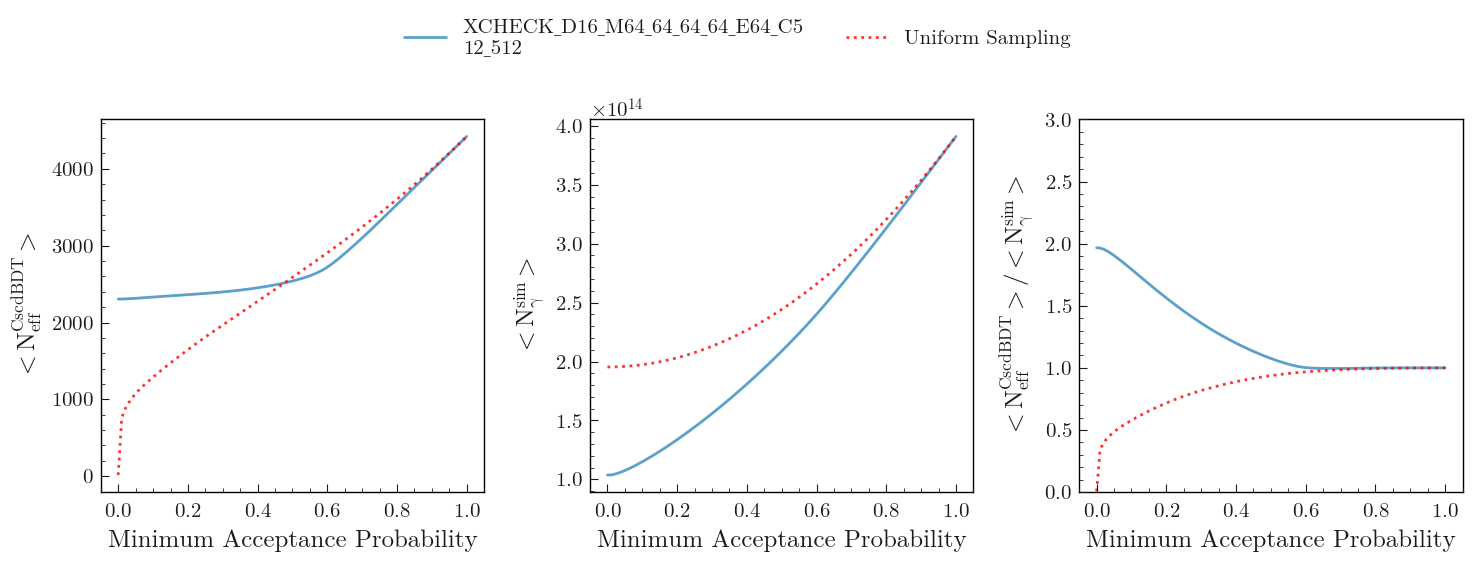

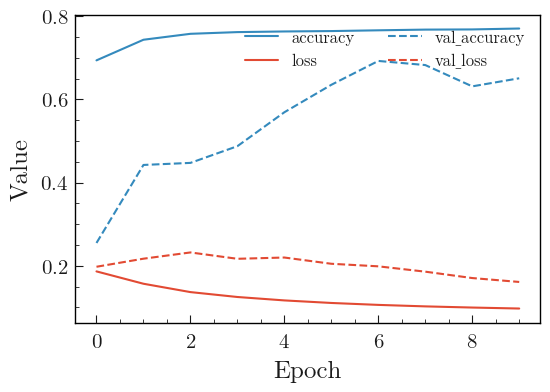

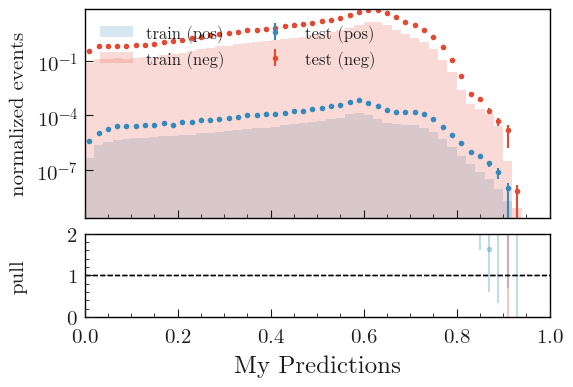

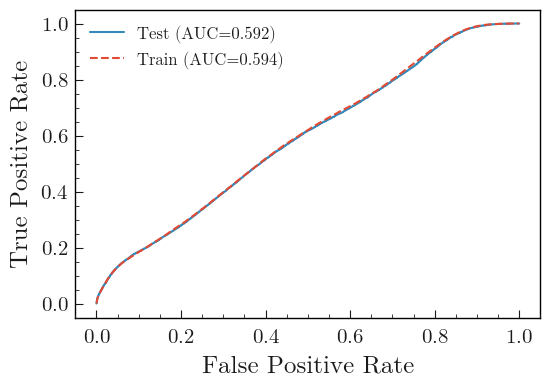

In [26]:
mf.make_plots()

In [6]:
import warnings
import os

warnings.filterwarnings('ignore')

print("Python warnings have been suppressed")

from tfxkit.core.model_factory import ModelFactory
import tfxkit
import logging
import sys
import custom_model

from tfxkit.core.logger import setup_logging
setup_logging(level=logging.INFO)

# print(f'{tfxkit.__version__ = }')
reload = True
mf = ModelFactory("/cephfs/users/nrad/work/i3rej/i3rej_test.yaml", 
                  overrides=[
                    # f"model.overwrite={reload==False}", 
                    # f"model.reload_model={reload}",
                   # "plotter.functions.plot_predictions.parameters.weight_column_train=1",
                #    "data.train_files=/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/train_RUS_to1to5.hdf5",
                #    "data.test_files=/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/test_small.hdf5",
                    "training.epochs=50",
                    # "info.model_name=i3rej_hp",
                    ],
                  debug=False
                  )
mf.builder.model.summary(expand_nested=True, line_length=130)

2025-11-18 13:45:51,720 - tfxkit.core.model_builder - INFO - Defining model with: define_muemb_model and args: {'event_branch_layers': [64], 'muon_branch_layers': [128, 128, 128], 'combination_layers': [64, 256, 256], 'muon_embedding_dim': 2, 'hidden_activation': 'relu', 'dropout': 0.1, 'dropout_muon': None, 'dropout_event': None, 'kernel_regularizer': 0.0001, 'aggregation_method': 'sum', 'batch_size': None, 'n_features': 90, 'n_labels': 1, 'features': ['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'log_energy_per_nucleon', 'depth', 'shower_muons_multiplicity', 'shower_mu1_radius', 'shower_mu2_radius', 'shower_mu3_radius', 'shower_mu4_radius', 'shower_mu5_radius', 'shower_mu6_radius', 'shower_mu7_radius', 'shower_mu8_radius', 'shower_mu9_radius', 'shower_mu10_radius', 'shower_mu1_log_energy', 'shower_mu2_log_energy', 'shower_mu3_log_energy', 'shower_mu4_log_energy', 'shower_mu5_log_energy', 'shower_mu6_log_energy', 'shower_mu7_log_energy

Python warnings have been suppressed
muon_pattern = 'mu\\d+_*'
features = ['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'log_energy_per_nucleon', 'depth', 'shower_muons_multiplicity', 'shower_mu1_radius', 'shower_mu2_radius', 'shower_mu3_radius', 'shower_mu4_radius', 'shower_mu5_radius', 'shower_mu6_radius', 'shower_mu7_radius', 'shower_mu8_radius', 'shower_mu9_radius', 'shower_mu10_radius', 'shower_mu1_log_energy', 'shower_mu2_log_energy', 'shower_mu3_log_energy', 'shower_mu4_log_energy', 'shower_mu5_log_energy', 'shower_mu6_log_energy', 'shower_mu7_log_energy', 'shower_mu8_log_energy', 'shower_mu9_log_energy', 'shower_mu10_log_energy', 'shower_mu1_pos_x', 'shower_mu1_pos_y', 'shower_mu1_pos_z', 'shower_mu1_dir_x', 'shower_mu1_dir_y', 'shower_mu1_dir_z', 'shower_mu2_pos_x', 'shower_mu2_pos_y', 'shower_mu2_pos_z', 'shower_mu2_dir_x', 'shower_mu2_dir_y', 'shower_mu2_dir_z', 'shower_mu3_pos_x', 'shower_mu3_pos_y', 'shower_mu3_pos_z', 'sho

Model: "MuonEmbedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ BatchNorm_Input                 │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_0_128_relu (Dense)        │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_0                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_0_0.1 (Dropout)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1_128_relu (Dense)        │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_1                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2_128_relu (Dense)        │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_2                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer_sigmoid (Dense)    │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,002 (140.63 KB)

 Trainable params: 35,218 (137.57 KB)

 Non-trainable params: 784 (3.06 KB)

<Sequential name=MuonEmbedding, built=True>
<class 'keras.src.models.sequential.Sequential'>


Model: "CombinedModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                         ┃ Output Shape                   ┃              Param # ┃ Connected to      
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━
│ muon_input (InputLayer)              │ (None, 10, 8)                  │                    0 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ event_input (InputLayer)             │ (None, 10)                     │                    0 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ time_distributed_4 (TimeDistributed) │ (None, 10, 2)                  │               36,002 │ muon_input[0][0]  
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ EventMLP (Sequential)                │ (None, 64)                     │                5,160 │ event_input[0][0] 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ BatchNorm_Input                 │ (None, 10)                     │                   40 │ -                 
│ (BatchNormalization)                 │                                │                      │                   
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ Dense_0_64_relu (Dense)         │ (None, 64)                     │                  704 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ BatchNorm_0                     │ (None, 64)                     │                  256 │ -                 
│ (BatchNormalization)                 │                                │                      │                   
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ Dropout_0_0.1 (Dropout)         │ (None, 64)                     │                    0 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ Output_Layer_sigmoid (Dense)    │ (None, 64)                     │                4,160 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ sum_aggregation_4 (SumAggregation)   │ (None, 2)                      │                    0 │ time_distributed_4
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ merge_branches (Concatenate)         │ (None, 66)                     │                    0 │ EventMLP[0][0],   
│                                      │                                │                      │ sum_aggregation_4[
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ batch_normalization_4                │ (None, 66)                     │                  264 │ merge_branches[0][
│ (BatchNormalization)                 │                                │                      │                   
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ dense_12 (Dense)                     │ (None, 64)                     │                4,288 │ batch_normalizatio
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ dropout_8 (Dropout)                  │ (None, 64)                     │                    0 │ dense_12[0][0]    
├──────────────────────────────────────┼────────────────

 Total params: 128,403 (501.57 KB)

 Trainable params: 127,339 (497.42 KB)

 Non-trainable params: 1,064 (4.16 KB)

In [8]:
mf.config_loader.save_config()

2025-11-18 16:57:39,167 - tfxkit.core.config_loader - INFO - Configuration saved to /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.12/20904/Oct20_TeVPA_HP/save_dir/i3rej_hp/config.yaml


{'learning_rate': 0.001, 'weight_decay': 0.0001, 'epsilon': 1e-07, 'beta_1': 0.9, 'beta_2': 0.999}

In [32]:
mf.config.optimizer.parameters.learning_rate = 1e-5
mf.config.optimizer.parameters.beta_1 = 0.8
mf.config.optimizer.parameters.beta_2 = 0.98

tfxkit.common.tf_utils.set_seeds(10)

mf.define_model()
mf.compile()
mf.fit(verbose=1)




2025-11-19 15:23:08,798 - tfxkit.core.model_builder - INFO - Defining model with: define_muemb_model and args: {'muon_prefix': 'shower_mu', 'event_branch_layers': '[64]', 'muon_branch_layers': '[64,64,64,64]', 'combination_layers': '[512,512]', 'muon_embedding_dim': 16, 'hidden_activation': 'relu', 'dropout': 0.1, 'dropout_muon': None, 'dropout_event': None, 'kernel_regularizer': 0.0001, 'aggregation_method': 'sum', 'batch_size': None, 'n_features': 90, 'n_labels': 1, 'features': ['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'log_energy_per_nucleon', 'depth', 'shower_muons_multiplicity', 'shower_mu1_radius', 'shower_mu2_radius', 'shower_mu3_radius', 'shower_mu4_radius', 'shower_mu5_radius', 'shower_mu6_radius', 'shower_mu7_radius', 'shower_mu8_radius', 'shower_mu9_radius', 'shower_mu10_radius', 'shower_mu1_log_energy', 'shower_mu2_log_energy', 'shower_mu3_log_energy', 'shower_mu4_log_energy', 'shower_mu5_log_energy', 'shower_mu6_log_ene

muon_pattern = 'shower_mu\\d+_*'
features = ['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'log_energy_per_nucleon', 'depth', 'shower_muons_multiplicity', 'shower_mu1_radius', 'shower_mu2_radius', 'shower_mu3_radius', 'shower_mu4_radius', 'shower_mu5_radius', 'shower_mu6_radius', 'shower_mu7_radius', 'shower_mu8_radius', 'shower_mu9_radius', 'shower_mu10_radius', 'shower_mu1_log_energy', 'shower_mu2_log_energy', 'shower_mu3_log_energy', 'shower_mu4_log_energy', 'shower_mu5_log_energy', 'shower_mu6_log_energy', 'shower_mu7_log_energy', 'shower_mu8_log_energy', 'shower_mu9_log_energy', 'shower_mu10_log_energy', 'shower_mu1_pos_x', 'shower_mu1_pos_y', 'shower_mu1_pos_z', 'shower_mu1_dir_x', 'shower_mu1_dir_y', 'shower_mu1_dir_z', 'shower_mu2_pos_x', 'shower_mu2_pos_y', 'shower_mu2_pos_z', 'shower_mu2_dir_x', 'shower_mu2_dir_y', 'shower_mu2_dir_z', 'shower_mu3_pos_x', 'shower_mu3_pos_y', 'shower_mu3_pos_z', 'shower_mu3_dir_x', 'shower_mu3_di

Model: "MuonBranch"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ BatchNorm_Input                 │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_0_64_relu (Dense)         │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_0                     │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_0_0.1 (Dropout)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1_64_relu (Dense)         │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_1                     │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2_64_relu (Dense)         │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_2                     │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3_64_relu (Dense)         │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_3                     │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer_sigmoid (Dense)    │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,152 (59.19 KB)

 Trainable params: 14,624 (57.12 KB)

 Non-trainable params: 528 (2.06 KB)

2025-11-19 15:23:08,889 - tfxkit.core.model_builder - INFO - Compiling model with optimizer: keras.optimizers.AdamW and parameters: 
{'learning_rate': 1e-05, 'weight_decay': 0.0001, 'epsilon': 1e-07, 'beta_1': 0.8, 'beta_2': 0.98}
2025-11-19 15:23:08,892 - tfxkit.core.model_builder - INFO - Compiling model with optimizer=<keras.src.optimizers.adamw.AdamW object at 0x7fba03193c80>, loss=binary_crossentropy, metrics=['accuracy']
2025-11-19 15:23:08,902 - tfxkit.core.trainer - INFO - Training model with fit_kwargs: {'verbose': 1, 'x': (            log_z   log_rho  log_length  log_energy  interaction_height  \
index                                                                     
344425   5.034232  5.348535    5.206584    4.060731          42661.6300   
1025145  5.048191  4.688263    4.936826    4.456648          33610.6075   
505758   5.043800  5.117524    5.070644    4.187942          37324.4650   
565860   5.043884  5.115999    5.127568    4.015214          26319.7625   
723222   5.

<Sequential name=MuonBranch, built=True>
<class 'keras.src.models.sequential.Sequential'>
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 272ms/step - accuracy: 0.1985 - loss: 0.2159 - val_accuracy: 0.0909 - val_loss: 0.2238
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.4104 - loss: 0.2078 - val_accuracy: 0.0910 - val_loss: 0.2177
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.5877 - loss: 0.2027 - val_accuracy: 0.0933 - val_loss: 0.2136
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.6644 - loss: 0.1993 - val_accuracy: 0.2539 - val_loss: 0.2112
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.6911 - loss: 0.1970 - val_accuracy: 0.4650 - val_loss: 0.2090
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.7029 - loss: 0.1953 - val_accuracy: 0.5714 - val_loss: 0.2069
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.7070 - loss: 0.1941 - val_accuracy: 0.6287 - val_loss: 0.2046
Epoch 8/10
29

2025-11-19 15:24:28,560 - tfxkit.core.model_builder - INFO - Model saved successfully to /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512/model.keras


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


2025-11-19 15:24:33,968 - tfxkit.core.plotter - INFO - Running plotter func: plot_speedup: speedup_utils.plot_speedup
2025-11-19 15:24:33,968 - tfxkit.core.plotter - INFO - with kwargs: {'save_results': True}
2025-11-19 15:24:42,941 - tfxkit.core.plotter - INFO - Resolving plot path: speedup, None, /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512
2025-11-19 15:24:42,941 - tfxkit.core.plotter - INFO - Resolved plot path: /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512/speedup


XCHECK_D16_M64_64_64_64_E64_C512_512 {'alpha': 0.8, 'ls': None, 'lw': 2}
uniform_pred {'color': 'red', 'label': 'Uniform Sampling', 'ls': ':', 'lw': 2, 'alpha': 0.8}


2025-11-19 15:24:43,338 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512/speedup.png
	/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512/speedup.pdf
2025-11-19 15:24:43,339 - tfxkit.core.plotter - INFO - Resolving plot path: speedup.pkl, None, /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512
2025-11-19 15:24:43,340 - tfxkit.core.plotter - INFO - Resolved plot path: /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/XCHECK_D16_M64_64_64_64_E64_C512_512/speedup.pkl
2025-11-19 15:24:43,343 - tfxkit.core.plotter - INFO - Running plotter func: plot_history: plot_history
2025-

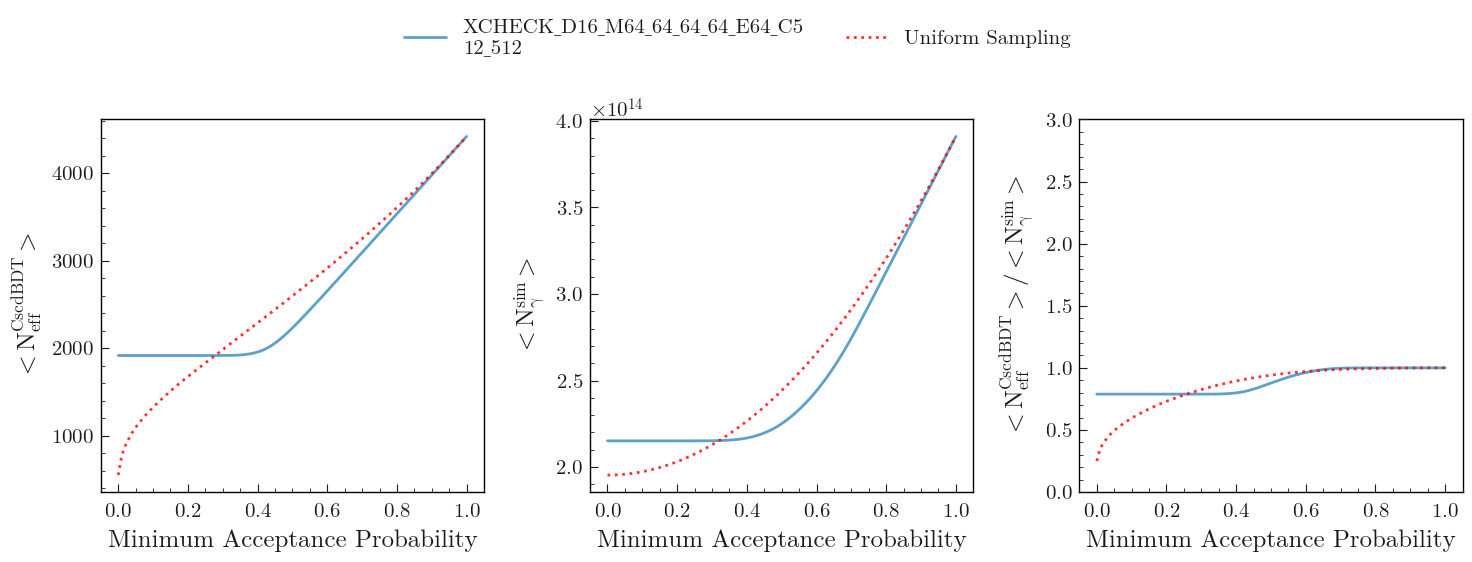

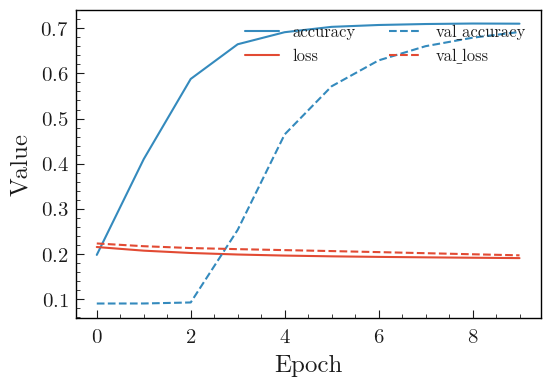

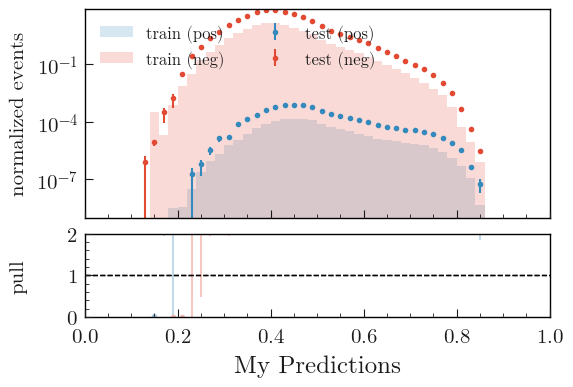

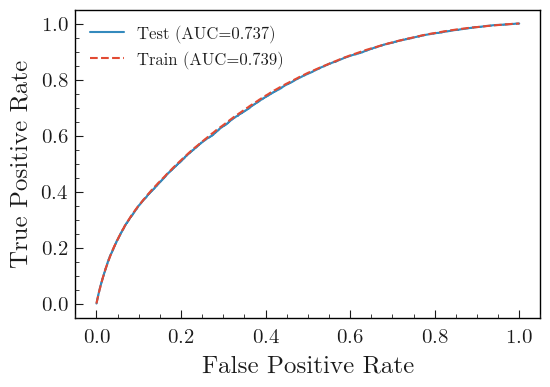

In [33]:

mf.make_plots()

In [17]:
mf.config_loader.save_config()

TypeError: ConfigLoader.save_config() missing 1 required positional argument: 'file_path'

In [63]:
# mf.df_train[['sample_weight', 'sample_weight_balanced', 'CscdBDT']]

vals = {}
for q in ['CscdBDT==1', 'CscdBDT==0']:
    vals[q] = (mf.df_train.query(q)['sample_weight_balanced']).sum()
    print(q, vals[q])

print( vals['CscdBDT==1']/vals['CscdBDT==0'] )

CscdBDT==1 101003.0
CscdBDT==0 79367.4
1.272600589158773


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


2025-10-20 17:44:07,751 - tfxkit.core.plotter - INFO - Running plotter func: plot_speedup: speedup_utils.plot_speedup
2025-10-20 17:44:07,752 - tfxkit.core.plotter - INFO - with kwargs: {}
2025-10-20 17:44:09,433 - tfxkit.core.plotter - INFO - Resolving plot path: speedup, None, save_dir_model/i3rej_hp
2025-10-20 17:44:09,434 - tfxkit.core.plotter - INFO - Resolved plot path: save_dir_model/i3rej_hp/speedup


100TeV {'alpha': 0.8, 'ls': None, 'lw': 2}
10TeV {'alpha': 0.8, 'ls': None, 'lw': 2}
i3rej_hp {'alpha': 0.8, 'ls': None, 'lw': 2}
uniform_pred {'color': 'red', 'label': 'Uniform Sampling', 'ls': ':', 'lw': 2, 'alpha': 0.8}


2025-10-20 17:44:09,804 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	save_dir_model/i3rej_hp/speedup.png
	save_dir_model/i3rej_hp/speedup.pdf
2025-10-20 17:44:09,805 - tfxkit.core.plotter - INFO - Running plotter func: plot_history: plot_history
2025-10-20 17:44:09,806 - tfxkit.core.plotter - INFO - with kwargs: {}
2025-10-20 17:44:09,807 - tfxkit.core.plotter - INFO - Resolving plot path: training_history, None, save_dir_model/i3rej_hp
2025-10-20 17:44:09,807 - tfxkit.core.plotter - INFO - Resolved plot path: save_dir_model/i3rej_hp/training_history
2025-10-20 17:44:09,995 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	save_dir_model/i3rej_hp/training_history.png
	save_dir_model/i3rej_hp/training_history.pdf
2025-10-20 17:44:09,995 - tfxkit.core.plotter - INFO - Running plotter func: plot_predictions: plot_predictions
2025-10-20 17:44:09,996 - tfxkit.core.plotter - INFO - with kwargs: {'plot_name': 'Preds', 'weight_column_train': [0.2], 'weight_column': None, 'x_la

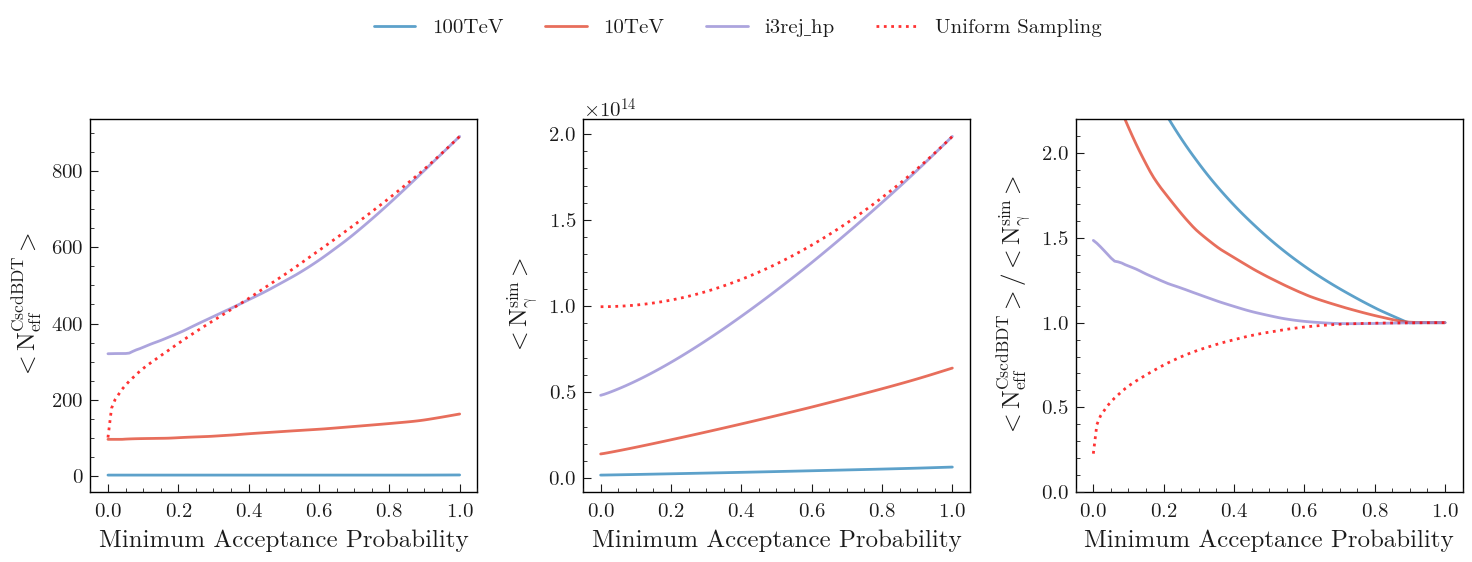

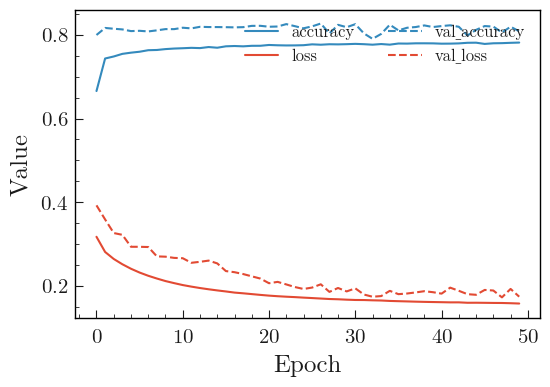

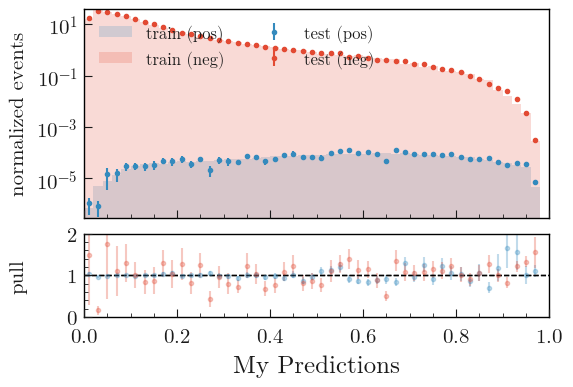

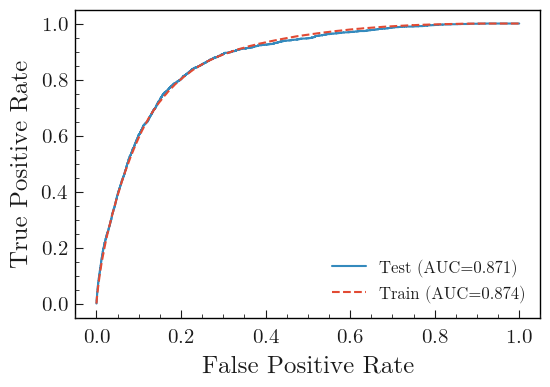

In [35]:
mf.make_plots()

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


2025-10-20 17:18:57,125 - tfxkit.core.plotter - INFO - Running plotter func: plot_speedup: speedup_utils.plot_speedup
2025-10-20 17:18:57,126 - tfxkit.core.plotter - INFO - with kwargs: {}
2025-10-20 17:18:59,102 - tfxkit.core.plotter - INFO - Resolving plot path: speedup, None, save_dir_model/i3rej_hp
2025-10-20 17:18:59,103 - tfxkit.core.plotter - INFO - Resolved plot path: save_dir_model/i3rej_hp/speedup


100TeV {'alpha': 0.8, 'ls': None, 'lw': 2}
10TeV {'alpha': 0.8, 'ls': None, 'lw': 2}
i3rej_hp {'alpha': 0.8, 'ls': None, 'lw': 2}
uniform_pred {'color': 'red', 'label': 'Uniform Sampling', 'ls': ':', 'lw': 2, 'alpha': 0.8}


2025-10-20 17:18:59,961 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	save_dir_model/i3rej_hp/speedup.png
	save_dir_model/i3rej_hp/speedup.pdf
2025-10-20 17:18:59,962 - tfxkit.core.plotter - INFO - Running plotter func: plot_history: plot_history
2025-10-20 17:18:59,962 - tfxkit.core.plotter - INFO - with kwargs: {}
2025-10-20 17:18:59,962 - tfxkit.core.plotter - INFO - Resolving plot path: training_history, None, save_dir_model/i3rej_hp
2025-10-20 17:18:59,963 - tfxkit.core.plotter - INFO - Resolved plot path: save_dir_model/i3rej_hp/training_history
2025-10-20 17:19:00,183 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	save_dir_model/i3rej_hp/training_history.png
	save_dir_model/i3rej_hp/training_history.pdf
2025-10-20 17:19:00,184 - tfxkit.core.plotter - INFO - Running plotter func: plot_predictions: plot_predictions
2025-10-20 17:19:00,184 - tfxkit.core.plotter - INFO - with kwargs: {'plot_name': 'Preds', 'weight_column_train': [0.2], 'weight_column': None, 'x_la

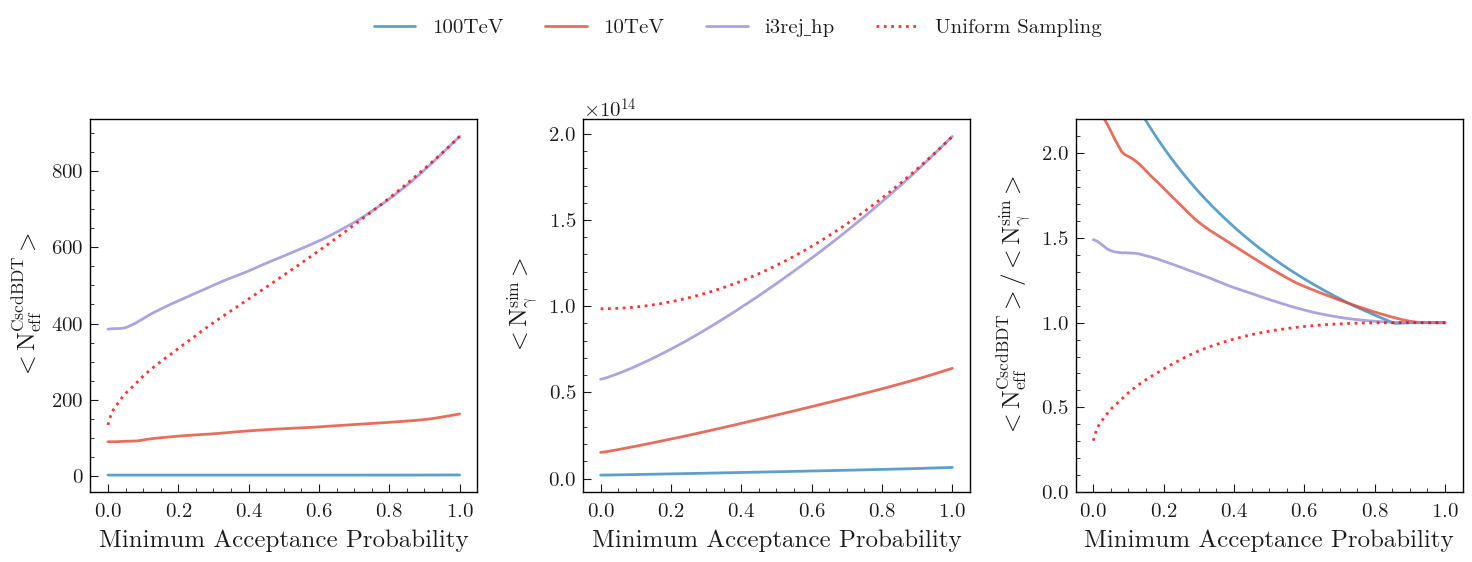

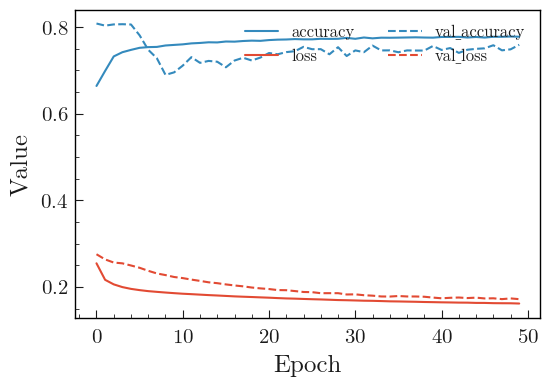

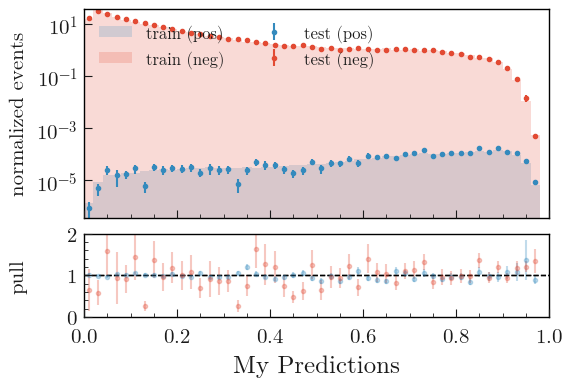

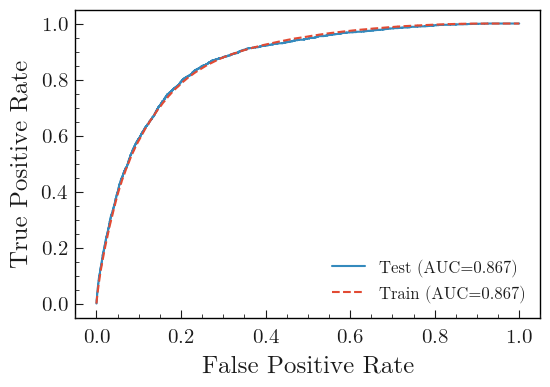

In [3]:
mf.make_plots()

In [24]:
del mf.data._X_train

mf.data.prep_Xy()

2025-10-20 17:25:42,856 - tfxkit.core.data_manager - INFO - Using the following weights column:
	                Training: sample_weight_balanced
	                Test:     None


muon 1: ['mu1_pos_x', 'mu1_pos_y', 'mu1_pos_z', 'mu1_dir_x', 'mu1_dir_y', 'mu1_dir_z', 'mu1_radius', 'mu1_log_energy']
muon 2: ['mu2_pos_x', 'mu2_pos_y', 'mu2_pos_z', 'mu2_dir_x', 'mu2_dir_y', 'mu2_dir_z', 'mu2_radius', 'mu2_log_energy']
muon 3: ['mu3_pos_x', 'mu3_pos_y', 'mu3_pos_z', 'mu3_dir_x', 'mu3_dir_y', 'mu3_dir_z', 'mu3_radius', 'mu3_log_energy']
muon 4: ['mu4_pos_x', 'mu4_pos_y', 'mu4_pos_z', 'mu4_dir_x', 'mu4_dir_y', 'mu4_dir_z', 'mu4_radius', 'mu4_log_energy']
muon 5: ['mu5_pos_x', 'mu5_pos_y', 'mu5_pos_z', 'mu5_dir_x', 'mu5_dir_y', 'mu5_dir_z', 'mu5_radius', 'mu5_log_energy']
muon 6: ['mu6_pos_x', 'mu6_pos_y', 'mu6_pos_z', 'mu6_dir_x', 'mu6_dir_y', 'mu6_dir_z', 'mu6_radius', 'mu6_log_energy']
muon 7: ['mu7_pos_x', 'mu7_pos_y', 'mu7_pos_z', 'mu7_dir_x', 'mu7_dir_y', 'mu7_dir_z', 'mu7_radius', 'mu7_log_energy']
muon 8: ['mu8_pos_x', 'mu8_pos_y', 'mu8_pos_z', 'mu8_dir_x', 'mu8_dir_y', 'mu8_dir_z', 'mu8_radius', 'mu8_log_energy']
muon 9: ['mu9_pos_x', 'mu9_pos_y', 'mu9_pos_z', 

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step


2025-10-20 17:26:01,662 - tfxkit.core.plotter - INFO - Running plotter func: plot_speedup: speedup_utils.plot_speedup
2025-10-20 17:26:01,663 - tfxkit.core.plotter - INFO - with kwargs: {}


100TeV {'alpha': 0.8, 'ls': None, 'lw': 2}
10TeV {'alpha': 0.8, 'ls': None, 'lw': 2}
i3rej_hp {'alpha': 0.8, 'ls': None, 'lw': 2}
uniform_pred {'color': 'red', 'label': 'Uniform Sampling', 'ls': ':', 'lw': 2, 'alpha': 0.8}


2025-10-20 17:26:11,769 - tfxkit.core.plotter - INFO - Resolving plot path: speedup, None, save_dir_model/i3rej_hp
2025-10-20 17:26:11,769 - tfxkit.core.plotter - INFO - Resolved plot path: save_dir_model/i3rej_hp/speedup
2025-10-20 17:26:12,148 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	save_dir_model/i3rej_hp/speedup.png
	save_dir_model/i3rej_hp/speedup.pdf
2025-10-20 17:26:12,149 - tfxkit.core.plotter - INFO - Running plotter func: plot_history: plot_history
2025-10-20 17:26:12,149 - tfxkit.core.plotter - INFO - with kwargs: {}
2025-10-20 17:26:12,150 - tfxkit.core.plotter - INFO - Resolving plot path: training_history, None, save_dir_model/i3rej_hp
2025-10-20 17:26:12,150 - tfxkit.core.plotter - INFO - Resolved plot path: save_dir_model/i3rej_hp/training_history
2025-10-20 17:26:12,338 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	save_dir_model/i3rej_hp/training_history.png
	save_dir_model/i3rej_hp/training_history.pdf
2025-10-20 17:26:12,339 - tfxkit.core.p

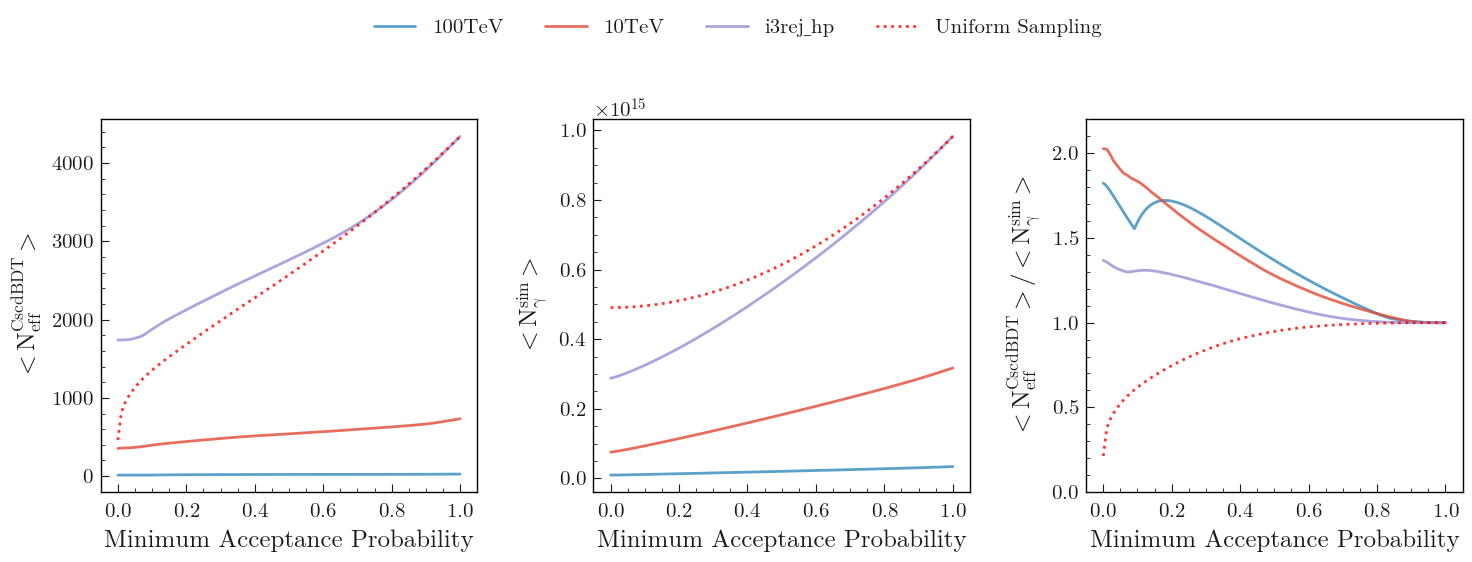

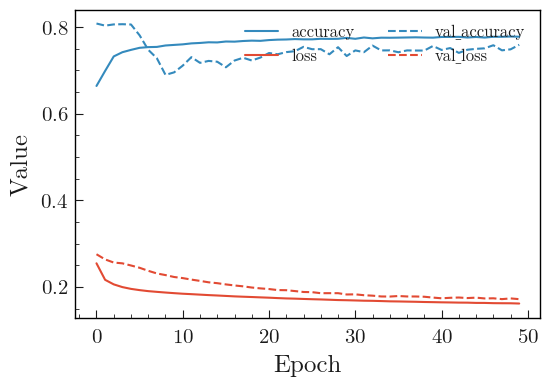

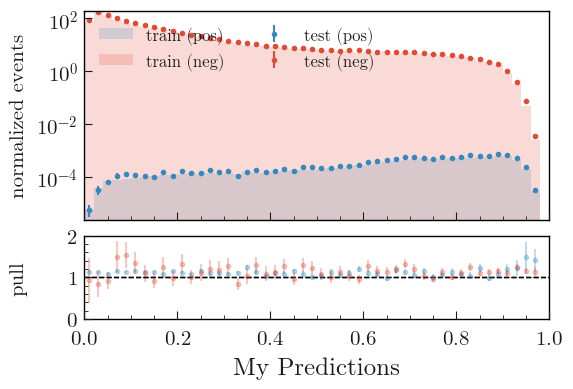

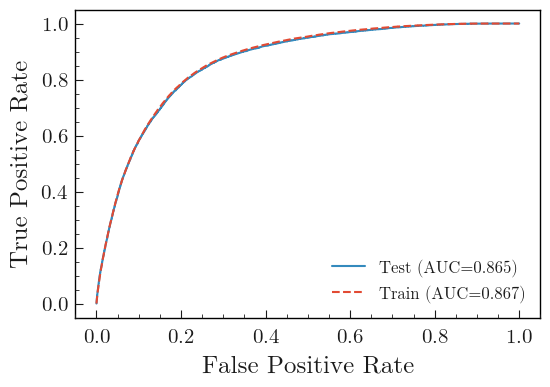

In [25]:
# mf.config.data.train_files=/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/train_RUS_to1to5.hdf5
mf.config.data.test_files="/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/test.hdf5"


# del mf.data._df_test
# del mf.data._X_test
# del mf.data._y_test
# mf.df_test
#['sel_flux_weights', 'sample_weight', 0.0225]
# mf.attach_predictions()
mf.config.plotter.weight_column_train=['sel_flux_weights', 'sample_weight', 0.1]
mf.make_plots()


2025-10-20 17:29:24,602 - tfxkit.core.plotter - INFO - Resolving plot path: speedup, None, save_dir_model/i3rej_hp
2025-10-20 17:29:24,603 - tfxkit.core.plotter - INFO - Resolved plot path: save_dir_model/i3rej_hp/speedup


Primary_100TeV {'alpha': 0.8, 'ls': None, 'lw': 2}
Primary10TeV {'alpha': 0.8, 'ls': None, 'lw': 2}
i3rej_hp {'alpha': 0.8, 'ls': None, 'lw': 2}
uniform_pred {'color': 'red', 'label': 'Uniform Sampling', 'ls': ':', 'lw': 2, 'alpha': 0.8}


2025-10-20 17:29:24,973 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	save_dir_model/i3rej_hp/speedup.png
	save_dir_model/i3rej_hp/speedup.pdf


((<Figure size 1500x500 with 3 Axes>,
  array([<Axes: xlabel='Minimum Acceptance Probability', ylabel='$<N_{eff}^{CscdBDT}>$'>,
         <Axes: xlabel='Minimum Acceptance Probability', ylabel='$<N_{\\gamma}^{sim}>$'>,
         <Axes: xlabel='Minimum Acceptance Probability', ylabel='$<N_{eff}^{CscdBDT}>$/$<N_{\\gamma}^{sim}>$'>],
        dtype=object)),
 {'Primary_100TeV':     min_pred  n_eff_passed  n_photons_simulated  n_eff_noflux_passed  \
  0   0.000000   1304.861817         1.862261e+14          2885.901034   
  1   0.010101   1326.629340         1.885058e+14          3865.446921   
  2   0.020202   1334.552610         1.916274e+14          3953.630169   
  3   0.030303   1341.963453         1.950473e+14          4025.284801   
  4   0.040404   1355.574687         1.986632e+14          4100.774105   
  ..       ...           ...                  ...                  ...   
  95  0.959596   2791.508721         7.164591e+14          6851.400768   
  96  0.969697   2820.832279       

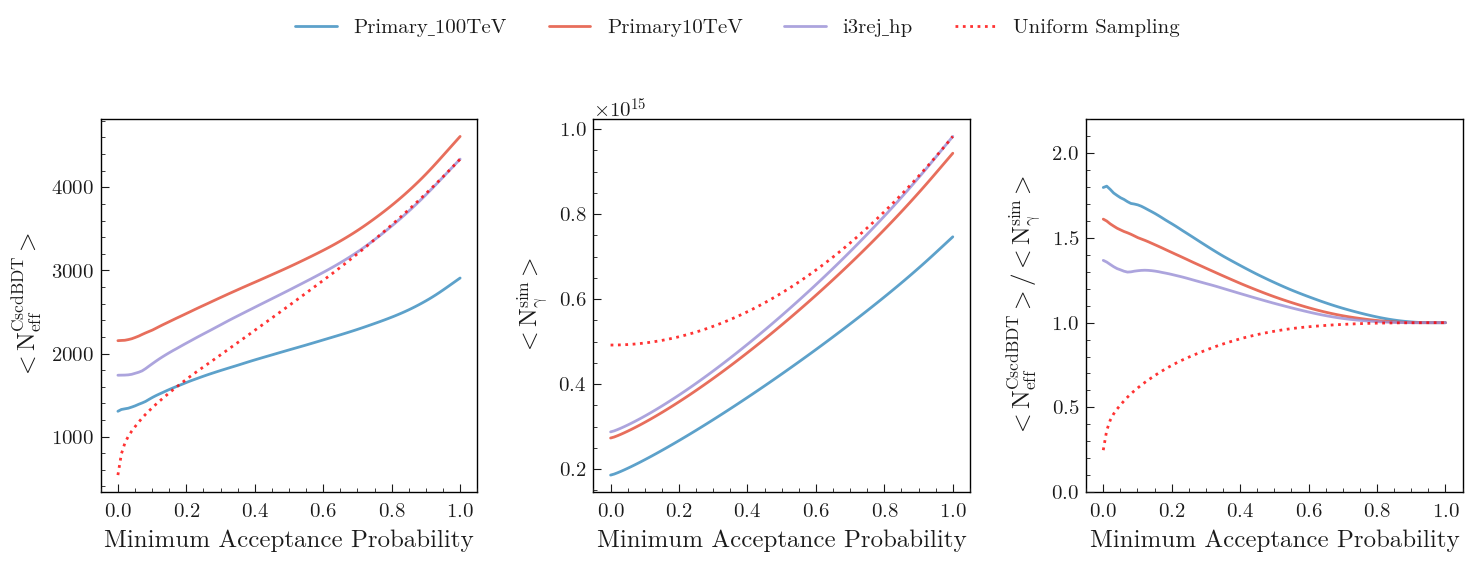

In [ ]:
import speedup_utils

selection_dict={'Primary_100TeV': 'energy>100_000', 
                'Primary10TeV': 'energy>10_000'
                }
speedup_utils.plot_speedup(mf.plotter, selection_dict=selection_dict)

2025-10-20 17:27:46,327 - tfxkit.core.plotter - INFO - Resolving plot path: None, None, save_dir_model/i3rej_hp
2025-10-20 17:27:46,328 - tfxkit.core.plotter - INFO - Resolved plot path: save_dir_model/i3rej_hp
2025-10-20 17:27:46,329 - tfxkit.core.plotter - INFO - Plotting classwise hist for variable: pred
2025-10-20 17:27:46,329 - tfxkit.core.plotter - INFO - weight_column: None
2025-10-20 17:27:46,330 - tfxkit.core.plotter - INFO - weight_column_train: None
2025-10-20 17:27:46,330 - tfxkit.core.plotter - INFO - using kwargs: {'weight_column': 'sel_flux_weights', 'weight_column_train': ['sel_flux_weights', 'sample_weight', 0.1]}
2025-10-20 17:27:47,187 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	save_dir_model/i3rej_hp.png
	save_dir_model/i3rej_hp.pdf


{'fig': <Figure size 600x400 with 2 Axes>,
 'ax_main': <Axes: ylabel='normalized events'>,
 'ax_comp': <Axes: xlabel='pred', ylabel='pull'>,
 'test_pos': Histogram(Regular(50, 0, 1, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=0.000444837, variance=1.10103e-10),
 'test_neg': Histogram(Regular(50, 0, 1, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=1.26231, variance=0.000221694),
 'train_pos': Histogram(Regular(50, 0, 1, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=0.00038416, variance=9.39805e-12),
 'train_neg': Histogram(Regular(50, 0, 1, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=1.16775, variance=0.00107519),
 'comp0': <Axes: xlabel='pred', ylabel='pull'>,
 'comp1': <Axes: xlabel='pred', ylabel='pull'>}

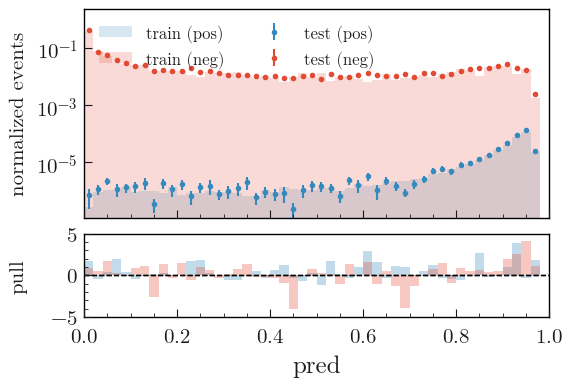

In [ ]:
mf.plotter.plot_predictions(query='energy > 1_000_000')

In [ ]:
mf.config.model

mf.builder.model.summary(expand_nes)

Signature:
mf.builder.model.summary(
    line_length=None,
    positions=None,
    print_fn=None,
    expand_nested=False,
    show_trainable=False,
    layer_range=None,
)
Source:   
    @traceback_utils.filter_traceback
    def summary(
        self,
        line_length=None,
        positions=None,
        print_fn=None,
        expand_nested=False,
        show_trainable=False,
        layer_range=None,
    ):
        """Prints a string summary of the network.

        Args:
            line_length: Total length of printed lines
                (e.g. set this to adapt the display to different
                terminal window sizes).
            positions: Relative or absolute positions of log elements
                in each line. If not provided, becomes
                `[0.3, 0.6, 0.70, 1.]`. Defaults to `None`.
            print_fn: Print function to use. By default, prints to `stdout`.
                If `stdout` doesn't work in your environment, change to `print`.
             

In [4]:
mf.hyper_tune()

2025-10-19 22:29:14,725 - tfxkit.core.tuner - INFO - Tuning sequence completed.


Trial 20 Complete [00h 02m 38s]
val_loss: 0.25886595249176025

Best val_loss So Far: 0.2574854791164398
Total elapsed time: 01h 06m 57s


In [25]:
seq = mf.hyper_tuner.run_sequence()
hp_values = seq[0][1].get_best_hyperparameters()[0].values

2025-10-20 13:50:28,467 - tfxkit.core.tuner - INFO - Running tuner step: generic_tuner
2025-10-20 13:50:28,469 - tfxkit.core.tuner - INFO - Using tuner function: BayesianOptimization with params: {'alpha': 0.001, 'beta': 2.6, 'executions_per_trial': 2, 'max_trials': 20, 'objective': 'val_loss', 'overwrite': False, 'project_name': 'HPTunning', 'directory': 'save_dir_model/i3rej_hp/HPTunning'}
2025-10-20 13:50:28,478 - tfxkit.core.tuner - INFO - Building model with config: {'data': {'features': ['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'log_energy_per_nucleon', 'depth', 'multiplicity', 'mu_radius_mean', 'mu_radius_std', 'mu_radius_min', 'mu_radius_max', 'mu_log_energy_mean', 'mu_log_energy_std', 'mu_log_energy_min', 'mu_log_energy_max', 'mu1_radius', 'mu2_radius', 'mu3_radius', 'mu4_radius', 'mu5_radius', 'mu6_radius', 'mu7_radius', 'mu8_radius', 'mu9_radius', 'mu10_radius', 'mu1_log_energy', 'mu2_log_energy', 'mu3_log_energy', 'mu4_l

Importing function: tfxkit.core.tuner.generic_tuner

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
[128, 128]        |[128, 128]        |model.parameters.event_branch_layers
512               |512               |model.parameters.muon_branch_layers
512               |512               |model.parameters.combination_layers
128               |128               |model.parameters.muon_embedding_dim



2025-10-20 13:50:31,000 - tfxkit.core.tuner - INFO - Building model with config: {'data': {'features': ['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'log_energy_per_nucleon', 'depth', 'multiplicity', 'mu_radius_mean', 'mu_radius_std', 'mu_radius_min', 'mu_radius_max', 'mu_log_energy_mean', 'mu_log_energy_std', 'mu_log_energy_min', 'mu_log_energy_max', 'mu1_radius', 'mu2_radius', 'mu3_radius', 'mu4_radius', 'mu5_radius', 'mu6_radius', 'mu7_radius', 'mu8_radius', 'mu9_radius', 'mu10_radius', 'mu1_log_energy', 'mu2_log_energy', 'mu3_log_energy', 'mu4_log_energy', 'mu5_log_energy', 'mu6_log_energy', 'mu7_log_energy', 'mu8_log_energy', 'mu9_log_energy', 'mu10_log_energy', 'singleness', 'mu_leading_energy_fraction', 'mu_bundle_log_energy', 'mu1_pos_x', 'mu1_pos_y', 'mu1_pos_z', 'mu1_dir_x', 'mu1_dir_y', 'mu1_dir_z', 'mu2_pos_x', 'mu2_pos_y', 'mu2_pos_z', 'mu2_dir_x', 'mu2_dir_y', 'mu2_dir_z', 'mu3_pos_x', 'mu3_pos_y', 'mu3_pos_z', 'mu3_dir_x'

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2035 - loss: nan - val_accuracy: 0.2004 - val_loss: nan
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2035 - loss: nan - val_accuracy: 0.2004 - val_loss: nan
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2035 - loss: nan - val_accuracy: 0.2004 - val_loss: nan
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2035 - loss: nan - val_accuracy: 0.2004 - val_loss: nan
Epoch 5/5
1/5 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2038 - loss: nan

KeyboardInterrupt: 

In [ ]:
def convert_dict_to_dotlist(d):
    return [f"{k}={v}" for k, v in d.items()]

hp_values = mf.hyper_tuner.tuners[0][1].get_best_hyperparameters(1)[0].values

convert_dict_to_dotlist(hp_values)

new_mf = mf.clone_factory(overrides=convert_dict_to_dotlist(hp_values))


In [14]:
import tfxkit.common.tf_utils as tf_utils

layers_list = '[12,123]'

layers_list = tf_utils.parse_layers_list(layers_list)
layers_list = layers_list if isinstance(layers_list, list) else [layers_list]
layers_list = [int(layer) for layer in layers_list]

print(type(layers_list), [type(k) for k in layers_list], layers_list)


<class 'list'> [<class 'int'>, <class 'int'>] [12, 123]


In [ ]:
import importlib
import speedup_utils
import keras
importlib.reload(speedup_utils)

model = mf.model
bare_model = speedup_utils.remove_final_activation(model)
for l in bare_model.layers:
    l.trainable = False

new_activation = speedup_utils.LogisticActivationLayer("logistic_activation")
x = bare_model.output
output = keras.layers.Dense(1, activation=new_activation, name="custom_logistic_classification")(x)
new_model = keras.Model(
    inputs=bare_model.input,
    outputs=output,
    name="CombinedModelLogistic",
)
mf.compile(new_model)
new_model.fit(mf.X_train, mf.y_train, epochs=10, batch_size=8192)


removing activation in <Dense name=classification, built=True>


In [49]:
mf.compile??

Signature: mf.compile(model=None, loss=None, metrics=None, **kwargs)
Source:   
    def compile(self, model=None, loss=None, metrics=None, **kwargs):
        """
        Compiles the model using the optimizer and loss function specified in the config.
        """

        model = self.model if model is None else model
        loss = self.loss if loss is None else loss
        metrics = self.metrics if metrics is None else metrics

        optimizer_kwargs = dict(**self.optimizer_parameters)
        optimizer_fn_name = self.optimizer_config.function

        if kwargs:
            logger.debug(f"Updating optimizer parameters with: {kwargs}")
            optimizer_kwargs.update(kwargs)
        logger.info(
            f"Compiling model with optimizer: {optimizer_fn_name} and parameters: \n{optimizer_kwargs}"
        )

        if "." in optimizer_fn_name:
            optimizer_fn = import_function(optimizer_fn_name)
            optimizer_fn = optimizer_fn(**optimizer_kwargs)
        else

In [51]:
# new_model.compile(mf.trainer.optimizer, mf.trainer.loss, metrics=mf.trainer.metrics)
mf.compile(new_model)
new_model.fit(mf.X_train, mf.y_train, epochs=10, batch_size=8192)

2025-10-20 14:19:27,964 - tfxkit.core.model_builder - INFO - Compiling model with optimizer: keras.optimizers.AdamW and parameters: 
{'learning_rate': 0.001, 'weight_decay': 0.0001, 'epsilon': 1e-07, 'beta_1': 0.9, 'beta_2': 0.999}
2025-10-20 14:19:27,967 - tfxkit.core.model_builder - INFO - Compiling model with optimizer=<keras.src.optimizers.adamw.AdamW object at 0x7fe8d2838710>, loss=binary_crossentropy, metrics=['accuracy']


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8190 - loss: 0.3787
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8233 - loss: 0.3739
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8243 - loss: 0.3727
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8246 - loss: 0.3723
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8243 - loss: 0.3726
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8241 - loss: 0.3724
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8245 - loss: 0.3726
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8245 - loss: 0.3724
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8241 - loss: 0.3727
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8245 - loss: 0.3723


In [53]:
mf.df_test['logistic_pred'] = new_model.predict(mf.X_test, batch_size=8192)
mf.df_train['logistic_pred'] = new_model.predict(mf.X_train, batch_size=8192)

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


2025-10-20 14:21:10,564 - tfxkit.core.plotter - INFO - Resolving plot path: None, None, save_dir_model/i3rej_hp
2025-10-20 14:21:10,565 - tfxkit.core.plotter - INFO - Resolved plot path: save_dir_model/i3rej_hp
2025-10-20 14:21:10,566 - tfxkit.core.plotter - INFO - Plotting classwise hist for variable: logistic_pred
2025-10-20 14:21:10,566 - tfxkit.core.plotter - INFO - weight_column: None
2025-10-20 14:21:10,567 - tfxkit.core.plotter - INFO - weight_column_train: None
2025-10-20 14:21:10,568 - tfxkit.core.plotter - INFO - using kwargs: {'weight_column': 'sel_flux_weights', 'weight_column_train': ['sel_flux_weights', 'sample_weight', 0.0225]}
2025-10-20 14:21:10,929 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	save_dir_model/i3rej_hp.png
	save_dir_model/i3rej_hp.pdf


{'fig': <Figure size 600x400 with 2 Axes>,
 'ax_main': <Axes: ylabel='normalized events'>,
 'ax_comp': <Axes: xlabel='logistic_pred', ylabel='pull'>,
 'test_pos': Histogram(Regular(50, 0, 1, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=0.00287739, variance=9.29747e-09),
 'test_neg': Histogram(Regular(50, 0, 1, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=220.311, variance=1.46062),
 'train_pos': Histogram(Regular(50, 0, 1, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=0.00281631, variance=2.08717e-10),
 'train_neg': Histogram(Regular(50, 0, 1, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=221.17, variance=1.52551),
 'comp0': <Axes: xlabel='logistic_pred', ylabel='pull'>,
 'comp1': <Axes: xlabel='logistic_pred', ylabel='pull'>}

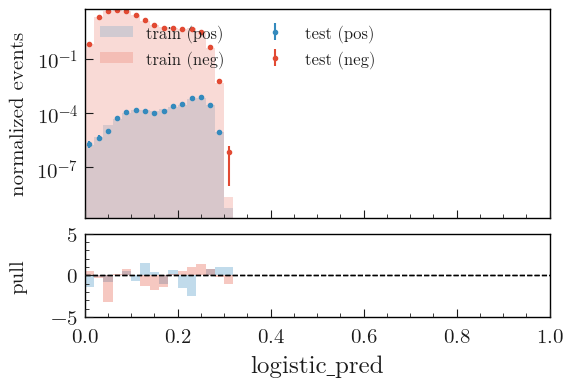

In [57]:
mf.plotter.plot_predictions('logistic_pred')

In [3]:
import warnings
import os

warnings.filterwarnings('ignore')

print("Python warnings have been suppressed")

from tfxkit.core.model_factory import ModelFactory
import tfxkit
import logging
import sys
import custom_model

from tfxkit.core.logger import setup_logging
setup_logging(level=logging.INFO)


reload = True
mf = ModelFactory(
            # "/lustre/fs23/group/icecube/nrad/www/plots/tfxkit/v0.0.8/Cscd_v0.0.14_mushowers/20904/ManHP_mushowers_fixedseed/save_dir/D16_M64_64_64_64_E64_C512_512/config.yaml", 
            "/cephfs/users/nrad/work/i3rej/i3rej_test.yaml",
                  overrides=[
                    # f"model.overwrite={reload==False}", 
                    # f"model.reload_model={reload}",
                   # "plotter.functions.plot_predictions.parameters.weight_column_train=1",
                #    "data.train_files=/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/train_RUS_to1to5.hdf5",
                #    "data.test_files=/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/test_small.hdf5",
                    "training.epochs=50",
                    "info.model_name=TEST_InIceAndShowerMuonEmbedding",
                    "data.xy_maker=custom_model.xy_maker_showermu_icemu_embedding",
                    "model.function=custom_model.define_muemb_showermuemb_model",
                    "+model.parameters.shower_muon_embedding_dim=4",
                    "+model.parameters.shower_muon_branch_layers=[64, 256, 256]",
                    "model.parameters.combination_layers=[256, 256]",
                    "model.parameters.event_branch_layers=[64, 64, 64]",
                    "model.parameters.muon_embedding_dim=8",
                    "model.parameters.muon_branch_layers=[256, 256]",
                    "model.parameters.aggregation_method=simple3",                    
                    "optimizer.parameters.learning_rate=0.0001",
                    # "optimizer.parameters.weight_decay="
                    "optimizer.parameters.beta_1=0.8",
                    "optimizer.parameters.beta_2=0.98",
                    ],
                  debug=False
                  )
mf.builder.model.summary(expand_nested=True, line_length=130)

Python warnings have been suppressed


2025-11-20 14:05:30,305 - tfxkit.core.model_builder - INFO - Loading model from /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding/model.keras (compile=False)...
2025-11-20 14:05:30.323900: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "CombinedModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                         ┃ Output Shape                   ┃              Param # ┃ Connected to      
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━
│ InIceMuonBranch_input (InputLayer)   │ (None, 10, 8)                  │                    0 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ ShowerMuonBranch_input (InputLayer)  │ (None, 10, 8)                  │                    0 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ event_input (InputLayer)             │ (None, 10)                     │                    0 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ time_distributed_10                  │ (None, 10, 8)                  │               10,216 │ InIceMuonBranch_in
│ (TimeDistributed)                    │                                │                      │                   
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ time_distributed_11                  │ (None, 10, 8)                  │               10,216 │ ShowerMuonBranch_i
│ (TimeDistributed)                    │                                │                      │                   
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│ EventMLP (Sequential)                │ (None, 64)                     │               13,992 │ event_input[0][0] 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ BatchNorm_Input                 │ (None, 10)                     │                   40 │ -                 
│ (BatchNormalization)                 │                                │                      │                   
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ Dense_0_64_relu (Dense)         │ (None, 64)                     │                  704 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ BatchNorm_0                     │ (None, 64)                     │                  256 │ -                 
│ (BatchNormalization)                 │                                │                      │                   
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ Dropout_0_0.1 (Dropout)         │ (None, 64)                     │                    0 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ Dense_1_64_relu (Dense)         │ (None, 64)                     │                4,160 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ BatchNorm_1                     │ (None, 64)                     │                  256 │ -                 
│ (BatchNormalization)                 │                                │                      │                   
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ Dense_2_64_relu (Dense)         │ (None, 64)                     │                4,160 │ -                 
├──────────────────────────────────────┼────────────────────────────────┼──────────────────────┼───────────────────
│    └ BatchNorm_2                     │ (None, 64)     

 Total params: 48,313 (188.72 KB)

 Trainable params: 46,949 (183.39 KB)

 Non-trainable params: 1,364 (5.33 KB)

In [4]:

mf.config.training.epochs=12
mf.compile()
mf.fit(verbose=1)


2025-11-20 14:05:55,818 - tfxkit.core.model_builder - INFO - Compiling model with optimizer: keras.optimizers.AdamW and parameters: 
{'learning_rate': 0.0001, 'weight_decay': 0.0001, 'epsilon': 1e-07, 'beta_1': 0.8, 'beta_2': 0.98}
2025-11-20 14:05:55,824 - tfxkit.core.model_builder - INFO - Compiling model with optimizer=<keras.src.optimizers.adamw.AdamW object at 0x7f9bed890410>, loss=binary_crossentropy, metrics=['accuracy']
2025-11-20 14:05:55,827 - tfxkit.core.data_manager - INFO - Using the following weights column:
	                Training: sample_weight_balanced
	                Test:     None


muon 1: ['mu1_pos_x', 'mu1_pos_y', 'mu1_pos_z', 'mu1_dir_x', 'mu1_dir_y', 'mu1_dir_z', 'mu1_radius', 'mu1_log_energy']
muon 2: ['mu2_pos_x', 'mu2_pos_y', 'mu2_pos_z', 'mu2_dir_x', 'mu2_dir_y', 'mu2_dir_z', 'mu2_radius', 'mu2_log_energy']
muon 3: ['mu3_pos_x', 'mu3_pos_y', 'mu3_pos_z', 'mu3_dir_x', 'mu3_dir_y', 'mu3_dir_z', 'mu3_radius', 'mu3_log_energy']
muon 4: ['mu4_pos_x', 'mu4_pos_y', 'mu4_pos_z', 'mu4_dir_x', 'mu4_dir_y', 'mu4_dir_z', 'mu4_radius', 'mu4_log_energy']
muon 5: ['mu5_pos_x', 'mu5_pos_y', 'mu5_pos_z', 'mu5_dir_x', 'mu5_dir_y', 'mu5_dir_z', 'mu5_radius', 'mu5_log_energy']
muon 6: ['mu6_pos_x', 'mu6_pos_y', 'mu6_pos_z', 'mu6_dir_x', 'mu6_dir_y', 'mu6_dir_z', 'mu6_radius', 'mu6_log_energy']
muon 7: ['mu7_pos_x', 'mu7_pos_y', 'mu7_pos_z', 'mu7_dir_x', 'mu7_dir_y', 'mu7_dir_z', 'mu7_radius', 'mu7_log_energy']
muon 8: ['mu8_pos_x', 'mu8_pos_y', 'mu8_pos_z', 'mu8_dir_x', 'mu8_dir_y', 'mu8_dir_z', 'mu8_radius', 'mu8_log_energy']
muon 9: ['mu9_pos_x', 'mu9_pos_y', 'mu9_pos_z', 

2025-11-20 14:06:11,700 - tfxkit.core.trainer - INFO - Training model with fit_kwargs: {'verbose': 1, 'x': (            log_z   log_rho  log_length  log_energy  interaction_height  \
index                                                                     
344425   5.034232  5.348535    5.206584    4.060731          42661.6300   
1025145  5.048191  4.688263    4.936826    4.456648          33610.6075   
505758   5.043800  5.117524    5.070644    4.187942          37324.4650   
565860   5.043884  5.115999    5.127568    4.015214          26319.7625   
723222   5.047428  4.852744    4.986895    4.157223          30936.9750   
...           ...       ...         ...         ...                 ...   
941753   5.015010  5.527320    5.376759    4.651971          42726.0150   
758458   5.042529  5.171175    5.119220    4.654730          34101.9125   
667707   5.036796  5.309851    5.253022    5.158482          28243.5675   
864703   5.014843  5.525977    5.479747    5.861488          24201.

Epoch 1/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 351ms/step - accuracy: 0.7853 - loss: 0.0870 - val_accuracy: 0.6309 - val_loss: 0.1222
Epoch 2/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.7840 - loss: 0.0869 - val_accuracy: 0.6634 - val_loss: 0.1195
Epoch 3/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.7848 - loss: 0.0868 - val_accuracy: 0.6419 - val_loss: 0.1202
Epoch 4/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.7855 - loss: 0.0867 - val_accuracy: 0.6598 - val_loss: 0.1199
Epoch 5/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.7853 - loss: 0.0865 - val_accuracy: 0.6527 - val_loss: 0.1205
Epoch 6/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.7859 - loss: 0.0866 - val_accuracy: 0.6094 - val_loss: 0.1218
Epoch 7/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.7856 - loss: 0.0863 - val_accuracy: 0.6516 - val_loss: 0.1200
Epoch 8/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.7849 - loss: 0.0862 - val_accuracy: 0

2025-11-20 14:08:10,101 - tfxkit.core.model_builder - INFO - Model saved successfully to /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding/model.keras


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step


2025-11-20 14:59:23,411 - tfxkit.core.plotter - INFO - Running plotter func: plot_speedup: speedup_utils.plot_speedup
2025-11-20 14:59:23,411 - tfxkit.core.plotter - INFO - with kwargs: {'save_results': True}
2025-11-20 14:59:33,292 - tfxkit.core.plotter - INFO - Resolving plot path: speedup, None, /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding
2025-11-20 14:59:33,293 - tfxkit.core.plotter - INFO - Resolved plot path: /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding/speedup


TEST_InIceAndShowerMuonEmbedding {'alpha': 0.8, 'ls': None, 'lw': 2}
uniform_pred {'color': 'red', 'label': 'Uniform Sampling', 'ls': ':', 'lw': 2, 'alpha': 0.8}


2025-11-20 14:59:34,366 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding/speedup.png
	/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding/speedup.pdf
2025-11-20 14:59:34,366 - tfxkit.core.plotter - INFO - Resolving plot path: speedup.pkl, None, /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding
2025-11-20 14:59:34,367 - tfxkit.core.plotter - INFO - Resolved plot path: /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding/speedup.pkl
2025-11-20 14:59:34,391 - tfxkit.core.plotter - INFO - Running plotter func: plot_history: plot_history
2025-11-20 14:59:34,391 - tfxkit.core.plotter - INFO - with kwargs: {}
20

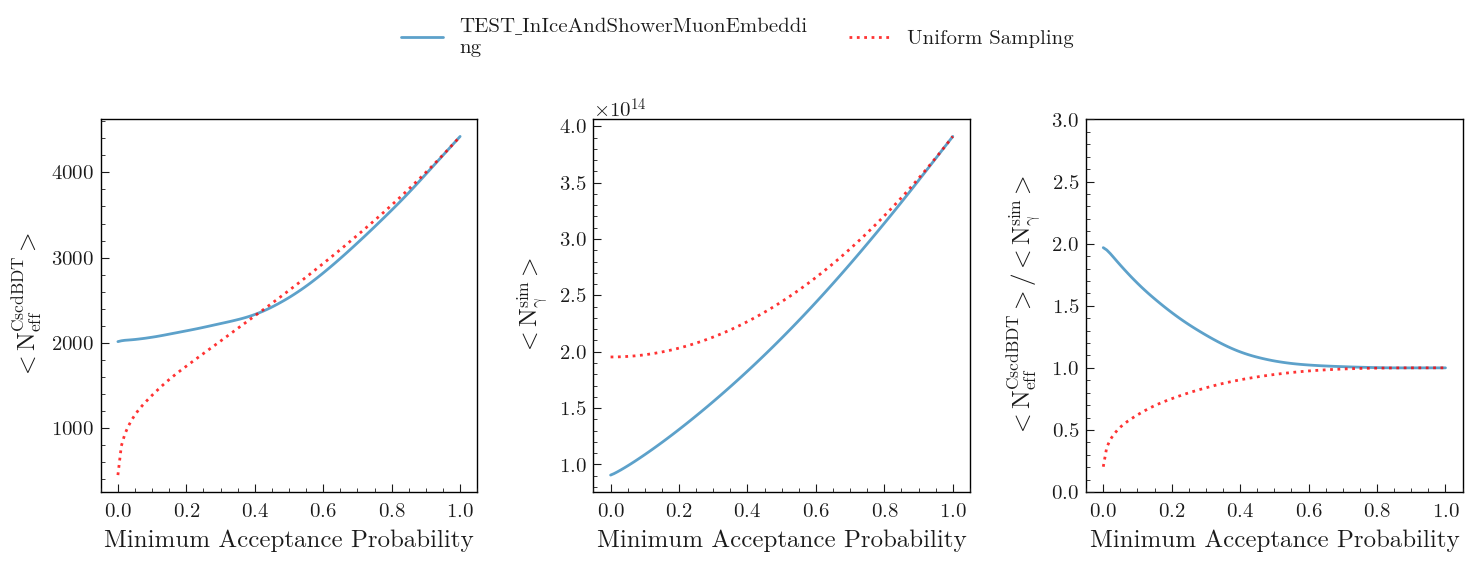

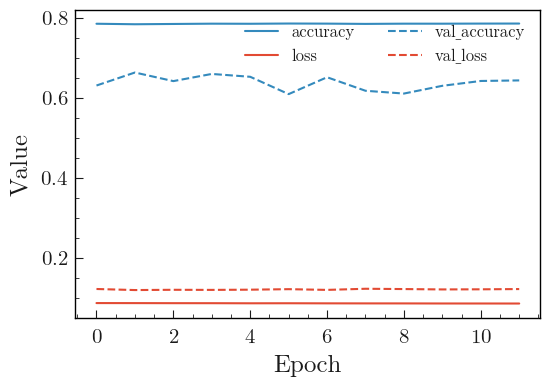

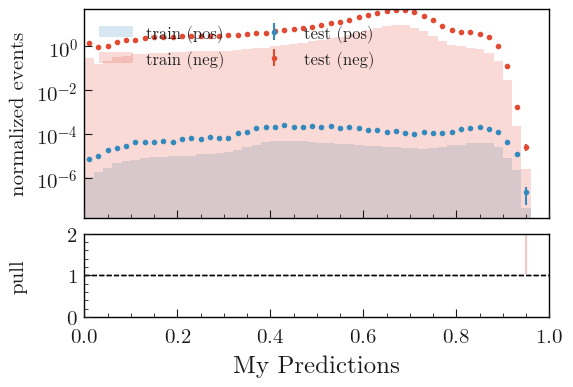

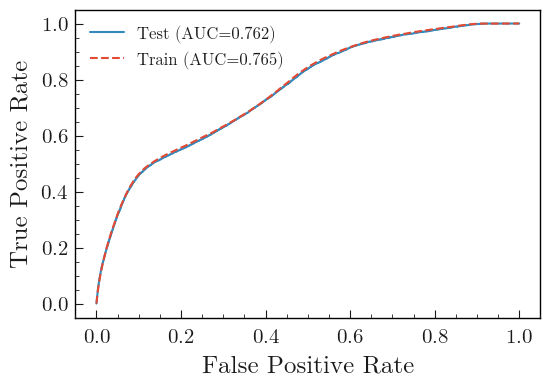

In [5]:
mf.make_plots()

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step


2025-11-20 12:08:00,931 - tfxkit.core.plotter - INFO - Running plotter func: plot_speedup: speedup_utils.plot_speedup
2025-11-20 12:08:00,932 - tfxkit.core.plotter - INFO - with kwargs: {'save_results': True}
2025-11-20 12:08:09,908 - tfxkit.core.plotter - INFO - Resolving plot path: speedup, None, /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding
2025-11-20 12:08:09,909 - tfxkit.core.plotter - INFO - Resolved plot path: /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding/speedup


TEST_InIceAndShowerMuonEmbedding {'alpha': 0.8, 'ls': None, 'lw': 2}
uniform_pred {'color': 'red', 'label': 'Uniform Sampling', 'ls': ':', 'lw': 2, 'alpha': 0.8}


2025-11-20 12:08:10,313 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding/speedup.png
	/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding/speedup.pdf
2025-11-20 12:08:10,314 - tfxkit.core.plotter - INFO - Resolving plot path: speedup.pkl, None, /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding
2025-11-20 12:08:10,314 - tfxkit.core.plotter - INFO - Resolved plot path: /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.124_mu_showers/20904/I3Rej/test/save_dir/TEST_InIceAndShowerMuonEmbedding/speedup.pkl
2025-11-20 12:08:10,318 - tfxkit.core.plotter - INFO - Running plotter func: plot_history: plot_history
2025-11-20 12:08:10,319 - tfxkit.core.plotter - INFO - with kwargs: {}
20

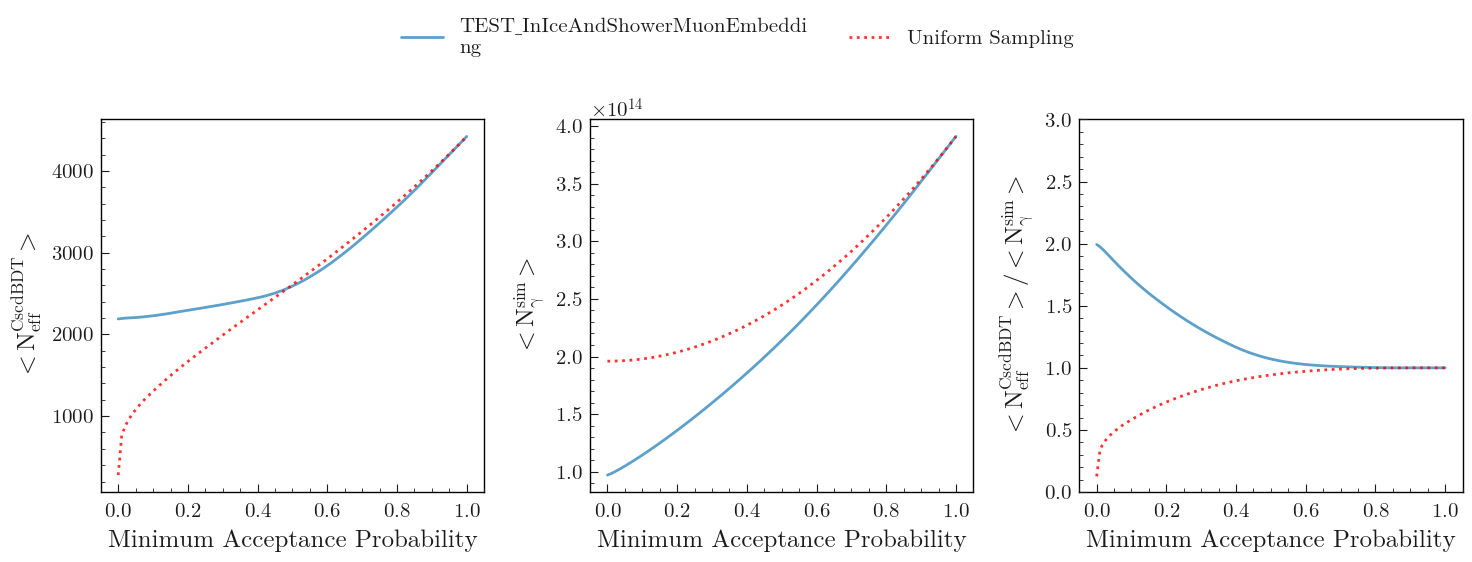

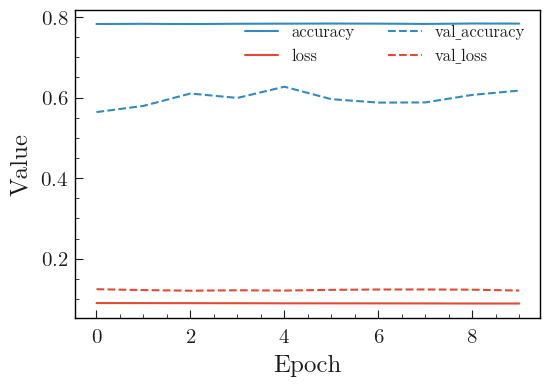

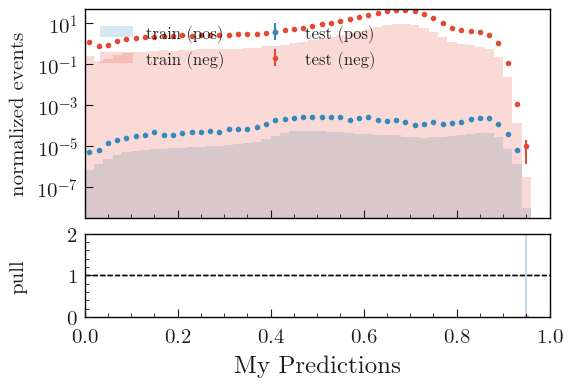

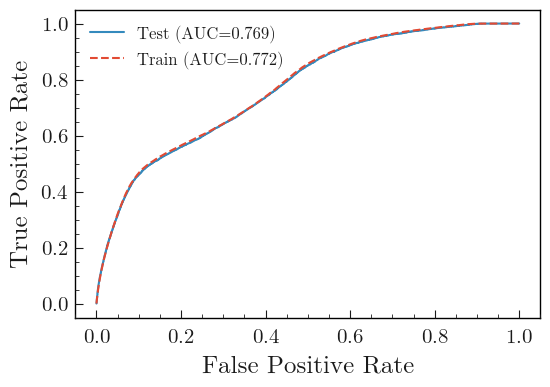

In [8]:
mf.make_plots()